<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Titanic Dataset
</p>
</div>

 <div class="alert alert-info">
  <strong>
                                     About Dataset

The data comes from NOAA's National Weather Service Storm Prediction Center Severe Weather Maps, Graphics, and Data Page

Data Dictionary
tornados.csv
variable	class	description

om	integer	Tornado number. Effectively an ID for this tornado in this year.

yr	integer	Year, 1950-2022.

mo	integer	Month, 1-12.

dy	integer	Day of the month, 1-31.

date	date	Date.

time	time	Time.

tz	character	Canonical tz database timezone.

datetime_utc	datetime	Date and time normalized to UTC.

st	character	Two-letter postal abbreviation for the state (DC = Washington, DC; PR = Puerto 

Rico; VI = Virgin Islands).

stf	integer	State FIPS (Federal Information Processing Standards) number.

mag	integer	Magnitude on the F scale (EF beginning in 2007). Some of these values are estimated (see fc).

inj	integer	Number of injuries. When summing for state totals, use sn == 1 (see below).

fat	integer	Number of fatalities. When summing for state totals, use sn == 1 (see below).

loss	double	Estimated property loss information in dollars. Prior to 1996, values were 

grouped into ranges. The reported number for such years is the maximum of its range.

slat	double	Starting latitude in decimal degrees.

slon	double	Starting longitude in decimal degrees.

elat	double	Ending latitude in decimal degrees.

elon	double	Ending longitude in decimal degrees.

len	double	Length in miles.

wid	double	Width in yards.

ns	integer	Number of states affected by this tornado. 1, 2, or 3.

sn	integer	State number for this row. 1 means the row contains the entire track information for 

this state, 0 means there is at least one more entry for this state for this tornado (om + yr).

f1	integer	FIPS code for the 1st county.

f2	integer	FIPS code for the 2nd county.

f3	integer	FIPS code for the 3rd county.

f4	integer	FIPS code for the 4th county.

fc	logical	Was the mag column estimated?
</strong>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Import Libraries
</p>
</div>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Load Dataset
</p>
</div>

In [38]:
df=pd.read_csv('tornados.csv')
df.sample(5)

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
25227,492,1985,7,31,1985-07-31,12:05:00,America/Chicago,1985-07-31T17:05:00Z,PA,42,...,-76.85,3.0,20,1,1,71,0,0,0,False
28376,1062,1990,10,18,1990-10-18,13:11:00,America/Chicago,1990-10-18T18:11:00Z,VA,51,...,0.00,0.1,10,1,1,59,0,0,0,False
43155,80,2002,4,27,2002-04-27,15:50:00,America/Chicago,2002-04-27T20:50:00Z,IA,19,...,-95.80,0.0,20,1,1,71,0,0,0,False
40310,611,1999,7,25,1999-07-25,17:10:00,America/Chicago,1999-07-25T22:10:00Z,MN,27,...,-94.37,0.2,0,1,1,97,0,0,0,False
25977,556,1986,7,25,1986-07-25,14:20:00,America/Chicago,1986-07-25T19:20:00Z,GA,13,...,0.00,0.5,53,1,1,251,0,0,0,False


In [39]:
df.shape

(68693, 27)

In [40]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'datetime_utc', 'st',
       'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon',
       'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

In [42]:
df.isnull().sum()/df.shape[0]*100

om               0.000000
yr               0.000000
mo               0.000000
dy               0.000000
date             0.000000
time             0.000000
tz               0.000000
datetime_utc     0.000000
st               0.000000
stf              0.000000
mag              1.100549
inj              0.000000
fat              0.000000
loss            39.552793
slat             0.000000
slon             0.000000
elat             0.000000
elon             0.000000
len              0.000000
wid              0.000000
ns               0.000000
sn               0.000000
f1               0.000000
f2               0.000000
f3               0.000000
f4               0.000000
fc               0.000000
dtype: float64

In [43]:
df['loss'].mean()

2020898.2224309419

In [44]:
df['loss'].median()

50000.0

In [45]:
df['loss'].fillna(df['loss'].median(),inplace=True)
df['mag'].fillna(df['mag'].mean(),inplace=True)

In [46]:
df['mag'].mean()

0.7787214625314629

In [47]:
df['mag'].median()

1.0

In [48]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'datetime_utc', 'st',
       'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon',
       'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [49]:
df['yr'].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [50]:
df['mo'].unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [51]:
df['dy'].unique()

array([ 1,  9, 20,  4,  2, 13, 25, 26,  3, 11, 12, 27, 16, 19, 18, 24, 28,
       29, 10, 14, 15, 22, 23, 30, 31,  5,  7,  8,  6, 21, 17],
      dtype=int64)

In [52]:
df=df.rename(columns={'mo':'month','dy':'day','yr':'year'})

In [53]:
df=df.drop(columns=['date','datetime_utc'])

In [55]:
df.head(10)

,om,year,month,day,time,tz,st,stf,mag,inj,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,21:00:00,America/Chicago,OK,40,1.0,0,...,-102.30,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,02:15:00,America/Chicago,NC,37,3.0,3,...,0.00,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,02:20:00,America/Chicago,KY,21,2.0,0,...,0.00,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,04:00:00,America/Chicago,KY,21,1.0,0,...,0.00,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,07:30:00,America/Chicago,MS,28,1.0,3,...,0.00,2.0,37,1,1,101,0,0,0,False
5,194,1950,11,4,17:00:00,America/Chicago,PA,42,3.0,1,...,-75.93,15.9,100,1,1,71,11,0,0,False
6,198,1950,12,2,15:00:00,America/Chicago,IL,17,2.0,3,...,-89.72,18.8,50,1,1,119,117,0,0,False
7,199,1950,12,2,16:00:00,America/Chicago,IL,17,3.0,25,...,-89.38,18.0,200,1,1,119,5,0,0,False
8,200,1950,12,2,16:25:00,America/Chicago,AR,5,3.0,0,...,-91.72,7.8,10,1,1,65,0,0,0,False
9,201,1950,12,2,17:30:00,America/Chicago,IL,17,1.0,0,...,-89.62,9.6,50,1,1,157,0,0,0,False


In [69]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

In [89]:
State=df['st'].value_counts().reset_index()
State.columns=['State','Count']
State

,State,Count
0,TX,9265
1,KS,4429
2,OK,4144
3,FL,3566
4,NE,2993
5,IA,2815
6,IL,2716
7,MS,2594
8,AL,2456
9,MO,2441


In [99]:
Year=df['year'].value_counts().reset_index()
Year.columns=['Year','Count']
Year

,Year,Count
0,2004,1817
1,2011,1691
2,2008,1689
3,2019,1517
4,2017,1428
...,...,...
68,1963,463
69,1953,421
70,1951,260
71,1952,240


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis
</p>
</div>

In [ ]:
# bar(data_frame=df['st'].value_counts().to_frame().reset_index(), x='st', y='count')

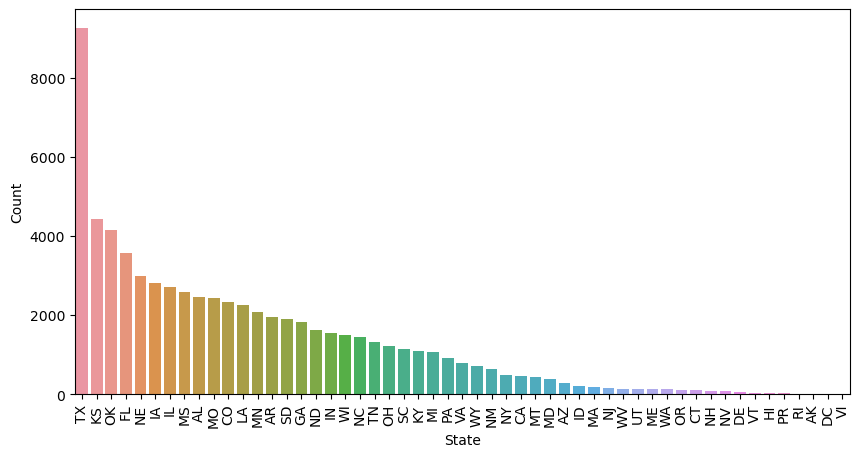

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(State,x='State',y='Count')
plt.xticks(rotation=90);

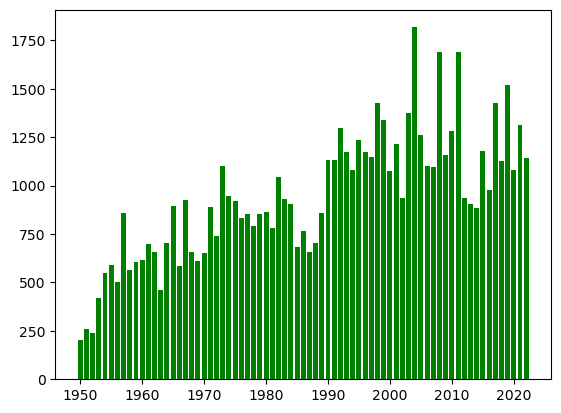

In [110]:
plt.bar(Year['Year'],Year['Count'],color='green');

<Axes: xlabel='Year', ylabel='Count'>

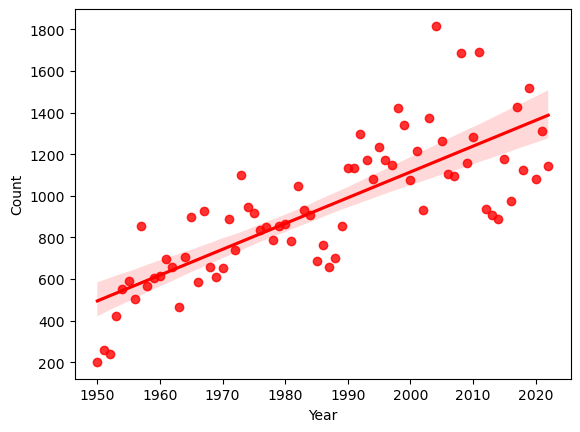

In [113]:
sns.regplot(Year,x='Year',y='Count',color='red')

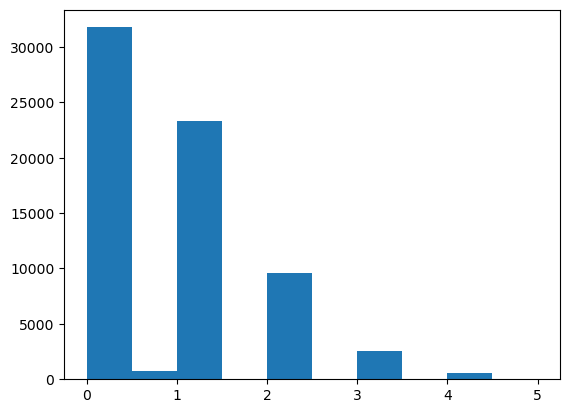

In [117]:
plt.hist(df['mag']);